# Part II - (What are the Factors That Affect Loan Outcome)
## by (Sussan Omeruah)

## Investigation Overview


> My goal at the beginning of this project was to determine factors that affect Loan outcome, that factors that contribute to a loan being completed, chargedoff/defaulted or delinquent.

> Some of the factors I found that affects loan outcome are Loan Amount, Borrower rate, Loan duration (Term) prosper rating and Income range


>  The loan original Amount is multimodal with loan amount of about 5000 having the most peak. The chart suggests that there are relatively more loans with lower amounts and fewer loans with higher amounts

> 2011 has the highest number of completed loans when Loan status is compared over time

> Loans taken for debt consolidation are most likely to be completed

> Prosper ratings of 4 (same as C- rating) and above have the largest Loan amounts but lowest borrower rates

> Borrowers in higher income ranges tend to have lower rates across all loan statuses
Loans that are charged off or defaulted tend to have higher rates across all income ranges, while completed loans tend to have the lowest rates

> The median borrower rate is generally higher for loans that have defaulted or charged off compared to loans that are current or completed
The median borrower rate tends to increase as the loan term gets longer, with the 60-month term having the highest median rate.



## Dataset Overview

> Prosper is a lending platform in the U.S. that offers a variety of resources people can use to try and improve their financial health, regardless of their financial situation. Users can consolidate debt, improve their home, or finance healthcare costs with personal loans among many other purposes. Investors who may be looking for new opportunities to diversify their portfolio can invest in personal loans.

> This data set contains 113,937 loans with 81 variables on each loan, with duration between november 2005 to march 2014, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this data dictionary to understand the dataset's variables.

In [19]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [20]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Edit_Prosper_Loan.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> A quick look into the distribution of The loan original Amount revealed that Loan amount is multimodal with loan amount of about 5000 having the most peak. 
The chart suggests that there are relatively more loans with lower amounts and fewer loans with higher amounts



W

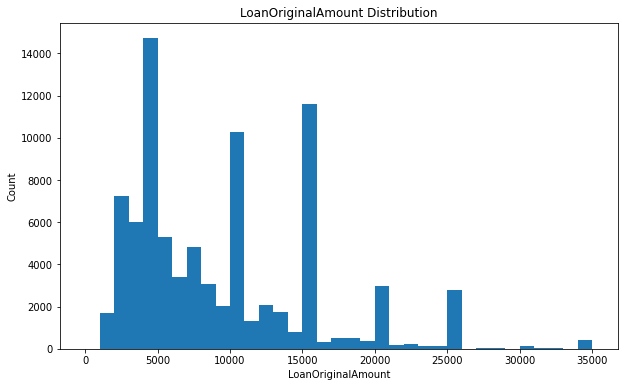

In [21]:
def plot_histogram(df, column, bin_size):
    # Create bins using specified bin size
    bins = np.arange(0, df[column].max()+bin_size, bin_size)

    # Create a histogram of the specified column
    base_color = sns.color_palette()[0]
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(df[column], bins=bins, color= base_color)

    # Set the chart title and axes labels
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plot_histogram(df,'LoanOriginalAmount',1000)

## (Visualization 2)

> When we look at how Loan outcomes have changed over the years, we see that 2011 and 2012 have the highest number of completed loans. However, 2012 also has the highest defaulted loans

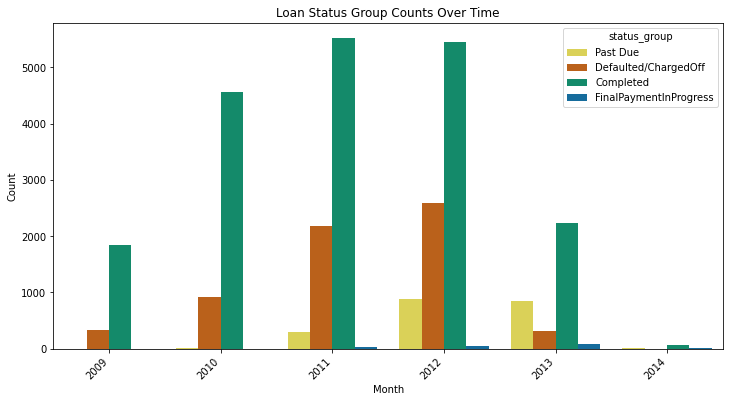

In [22]:
# create a dictionary to map loan statuses to their corresponding group
status_groups = {
    'Completed': 'Completed',
    'Defaulted': 'Defaulted/ChargedOff',
    'Chargedoff': 'Defaulted/ChargedOff',
    'Past Due (1-15 days)': 'Past Due',
    'Past Due (16-30 days)': 'Past Due',
    'Past Due (31-60 days)': 'Past Due',
    'Past Due (61-90 days)': 'Past Due',
    'Past Due (91-120 days)': 'Past Due',
    'Past Due (>120 days)': 'Past Due',
    'FinalPaymentInProgress': 'FinalPaymentInProgress'
}

# create a new column for the loan status group
df['status_group'] = df['LoanStatus'].map(status_groups)


# plot the loan status group counts over the years
colored = ['#F0E442','#D55E00','#009E73','#0072B2']

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ListingYear', hue='status_group', palette=colored)
plt.title('Loan Status Group Counts Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right');

## (Visualization 3)

Loans taken for debt consolidation are most likely to be completed
Investors who want to invest in personal loans can decide to invest in loans with debt consolidation in Listing category

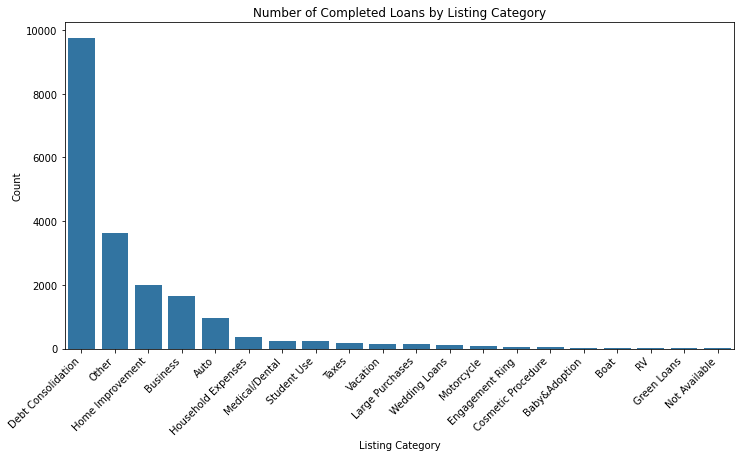

In [23]:
# Count the number of loans for each purpose
purpose_counts = df['ListingCategory (numeric)'].value_counts().sort_index()

# Map the numeric categories to their corresponding string values

listing_category = {
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'
}


# create a subset dataframe with only completed loans
completed_loans = df[df['LoanStatus'] == 'Completed']

# count the number of completed loans for each listing category
listing_counts = completed_loans['ListingCategory (numeric)'].value_counts()

# map the numeric listing categories to their corresponding names
listing_counts.index = listing_counts.index.map(listing_category)

# create a bar plot of completed loans by listing category
base_color = sns.color_palette()[0]
plt.figure(figsize=(12, 6))
sns.barplot(x=listing_counts.index, y=listing_counts.values, color= base_color)
plt.title('Number of Completed Loans by Listing Category')
plt.xlabel('Listing Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right');

### Visualization 4
Prosper ratings of 4 (same as C- rating) and above have the largest Loan amounts but lowest borrower rates.
It appears that Borrowers with high prosper rating get the best loan deals

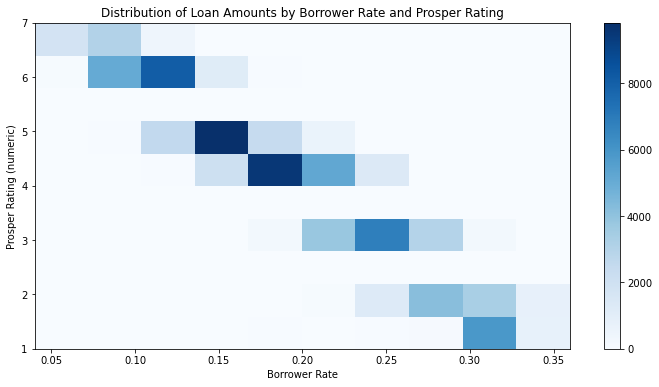

In [24]:
median_loan_by_rating_rate = df.pivot_table(index='BorrowerRate', columns='ProsperRating (numeric)', values='LoanOriginalAmount', aggfunc='median')

# plot 2D histogram
plt.figure(figsize=(12, 6))
plt.hist2d(x=df['BorrowerRate'], y=df['ProsperRating (numeric)'], bins=(10,10), cmap=plt.cm.Blues)

# add a colorbar
plt.colorbar()

# set the title and axis labels

plt.title('Distribution of Loan Amounts by Borrower Rate and Prosper Rating')
plt.xlabel('Borrower Rate')
plt.ylabel('Prosper Rating (numeric)');

### Visualization 5

Borrowers in higher income ranges tend to have lower rates across all loan statuses
Loans that are charged off or defaulted tend to have higher rates across all income ranges, while completed loans tend to have the lowest rates.
Borrowers with high rating and high income range may secure large loans with the least borrower rates but if they don't pay on time, the rates increase


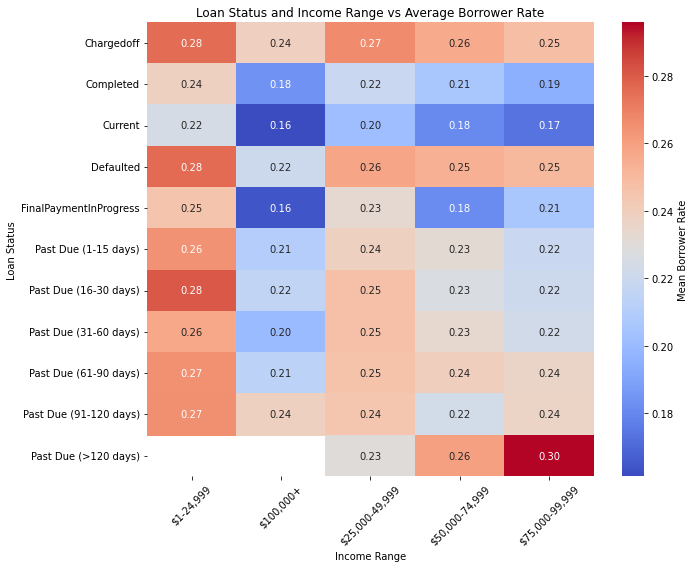

In [25]:
# create heatmap of Mean Borrower rate across Loan status and Income Range

plt.figure(figsize=(10, 8))
pivot_table = pd.pivot_table(df, values='BorrowerRate', index='LoanStatus', columns='IncomeRange', aggfunc=np.mean)
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Mean Borrower Rate'})
plt.title('Loan Status and Income Range vs Average Borrower Rate')
plt.xlabel('Income Range')
plt.xticks(rotation=45)
plt.ylabel('Loan Status')
plt.tight_layout();

### Visualization 6

The median borrower rate is generally higher for loans that have defaulted or charged off compared to loans that are current or completed
The median borrower rate tends to increase as the loan term gets longer, with the 60-month term having the highest median rate.
Borrowers looking to get the lowest rates should probably opt for lower loan periods

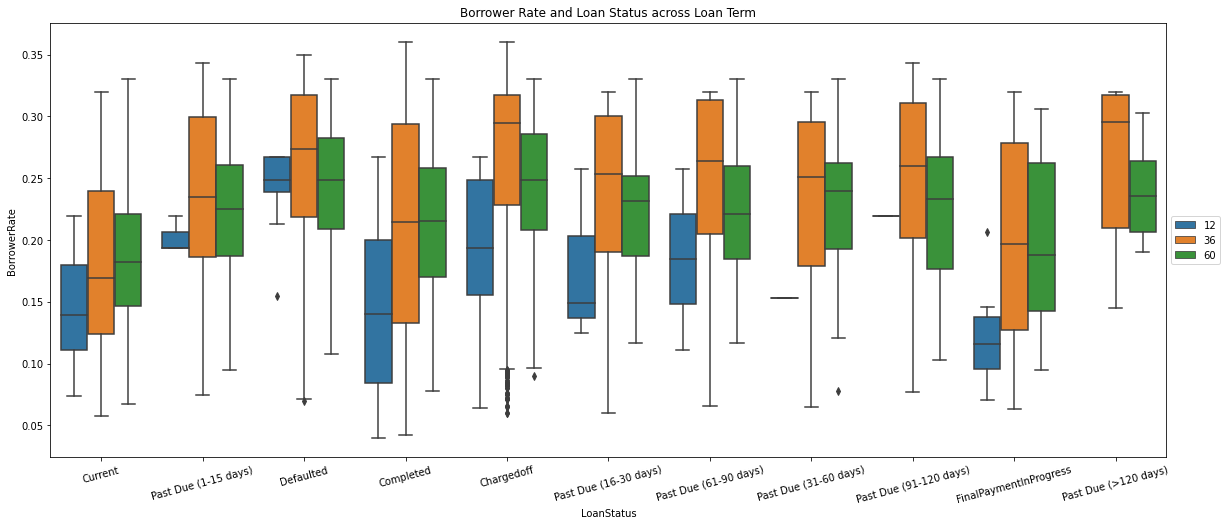

In [26]:
#Creating a boxplot for BorrowerRate, LoanStatus, and Term with the Term as color encoding
plt.figure(figsize=[20,8])
sns.boxplot(data = df, y = 'BorrowerRate', x = 'LoanStatus', hue = 'Term')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15);
plt.title('Borrower Rate and Loan Status across Loan Term');


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_prosper.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_prosper.ipynb to slides
[NbConvertApp] Writing 502827 bytes to Part_II_slide_deck_prosper.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_prosper.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
